# 1. Application data preprocessing
Preprocess application_train.csv and application_test.csv

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
rawdata_train = pd.read_csv('rawdata/application_train.csv')
rawdata_test = pd.read_csv('rawdata/application_test.csv')

In [15]:
rawdata_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Response variable

In [16]:
rawdata_train['TARGET'].value_counts(dropna=False)

0    282686
1     24825
Name: TARGET, dtype: int64

No missing data in response variable. And the label is imbalanced.

## Outliers in Predictors

In [17]:
rawdata_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [18]:
num_var = (rawdata_train.dtypes == 'int64') | (rawdata_train.dtypes == 'float64')
num_var_name = list(num_var[num_var==True].index)
num_var_name.remove('SK_ID_CURR')
num_var_name.remove('TARGET')
len(num_var_name)

104

In [19]:
num_var_name_notbinary = [name for name in num_var_name if 'FLAG' not in name and 'NOT' not in name]
len(num_var_name_notbinary)

72

In [20]:
num_var_name_binary = [name for name in num_var_name if 'FLAG' in name or 'NOT' in name]
len(num_var_name_binary)

32

In [21]:
binary_outlier_check = (rawdata_train[num_var_name_binary].isin([0,1])==False).sum()
binary_outlier_check[binary_outlier_check>0]

Series([], dtype: int64)

In [22]:
binary_outlier_check = (rawdata_test[num_var_name_binary].isin([0,1])==False).sum()
binary_outlier_check[binary_outlier_check>0]

Series([], dtype: int64)

In [23]:
rawdata_train[num_var_name_notbinary[0:15]].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,2.152665,2.052463,2.031521,12.063419
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.910682,0.509034,0.502737,3.265832
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,2.000000,2.000000,2.000000,10.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,2.000000,2.000000,2.000000,12.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,3.000000,2.000000,2.000000,14.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,20.000000,3.000000,3.000000,23.000000


In [24]:
rawdata_test[num_var_name_notbinary[0:15]].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START
count,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,2.146767,2.038159,2.012596,12.007365
std,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,1569.276709,11.462889,0.890423,0.522694,0.515804,3.278172
min,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,-6348.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,-4448.000000,4.000000,2.000000,2.000000,2.000000,10.000000
50%,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,-3234.000000,9.000000,2.000000,2.000000,2.000000,12.000000
75%,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,-1706.000000,15.000000,3.000000,2.000000,2.000000,14.000000
max,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,0.000000,74.000000,21.000000,3.000000,3.000000,23.000000


In [25]:
rawdata_train[num_var_name_notbinary[15:30]].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG
count,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000
mean,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399
std,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565
min,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.334007,3.924574e-01,0.370650,0.05770,0.044200,0.976700,0.687200,0.007800,0.000000,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300
50%,0.505998,5.659614e-01,0.535276,0.08760,0.076300,0.981600,0.755200,0.021100,0.000000,0.137900,0.166700,0.208300,0.048100,0.075600,0.074500
75%,0.675053,6.636171e-01,0.669057,0.14850,0.112200,0.986600,0.823200,0.051500,0.120000,0.206900,0.333300,0.375000,0.085600,0.121000,0.129900
max,0.962693,8.549997e-01,0.896010,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
rawdata_test[num_var_name_notbinary[15:30]].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG
count,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000
mean,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286
std,0.205142,0.181278,0.189498,0.113112,0.081536,0.049318,0.113188,0.082868,0.139164,0.100669,0.147361,0.164976,0.081909,0.098284,0.114860
min,0.013458,0.000008,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343695,0.408066,0.363945,0.061900,0.046700,0.976700,0.687200,0.008100,0.000000,0.074500,0.166700,0.104200,0.019000,0.050400,0.048575
50%,0.506771,0.558758,0.519097,0.092800,0.078100,0.981600,0.755200,0.022700,0.000000,0.137900,0.166700,0.208300,0.048300,0.075600,0.077000
75%,0.665956,0.658497,0.652897,0.148500,0.113400,0.986600,0.816400,0.053900,0.160000,0.206900,0.333300,0.375000,0.086800,0.126900,0.137600
max,0.939145,0.855000,0.882530,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
rawdata_train[num_var_name_notbinary[30:45]].describe()

,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE
count,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000
mean,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076
std,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.052500,0.040700,0.976700,0.699400,0.007200,0.000000,0.069000,0.166700,0.083300,0.016600,0.054200,0.042700,0.000000
50%,0.000000,0.003600,0.084000,0.074600,0.981600,0.764800,0.019000,0.000000,0.137900,0.166700,0.208300,0.045800,0.077100,0.073100,0.000000
75%,0.003900,0.027700,0.143900,0.112400,0.986600,0.823600,0.049000,0.120800,0.206900,0.333300,0.375000,0.084100,0.131300,0.125200,0.003900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
rawdata_test[num_var_name_notbinary[30:45]].describe()

,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE
count,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000
mean,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.080570,0.147161,0.229390,0.233854,0.065914,0.110874,0.110687,0.008358
std,0.048749,0.072007,0.113465,0.082655,0.053782,0.110117,0.081169,0.137509,0.101748,0.146485,0.165034,0.082880,0.103980,0.116699,0.046657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.058800,0.042500,0.976200,0.692900,0.007600,0.000000,0.069000,0.166700,0.083300,0.016525,0.055100,0.045600,0.000000
50%,0.000000,0.003800,0.085100,0.077000,0.981600,0.758300,0.020300,0.000000,0.137900,0.166700,0.208300,0.046200,0.081700,0.075100,0.000000
75%,0.005100,0.029000,0.150200,0.113550,0.986600,0.823600,0.051700,0.120800,0.206900,0.333300,0.375000,0.085600,0.132200,0.130600,0.003900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
rawdata_train[num_var_name_notbinary[45:60]].describe()

,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI
count,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000
mean,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236
std,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.058300,0.043700,0.976700,0.691400,0.007900,0.000000,0.069000,0.166700,0.083300,0.018700,0.051300,0.045700,0.000000,0.000000
50%,0.001100,0.086400,0.075800,0.981600,0.758500,0.020800,0.000000,0.137900,0.166700,0.208300,0.048700,0.076100,0.074900,0.000000,0.003100
75%,0.023100,0.148900,0.111600,0.986600,0.825600,0.051300,0.120000,0.206900,0.333300,0.375000,0.086800,0.123100,0.130300,0.003900,0.026600
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
rawdata_test[num_var_name_notbinary[45:60]].describe()

,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI
count,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000
mean,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296
std,0.073504,0.114184,0.081022,0.049663,0.111998,0.082892,0.139014,0.100931,0.147629,0.165241,0.082869,0.099737,0.116503,0.048148,0.072998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.062500,0.046150,0.976700,0.691400,0.008000,0.000000,0.069000,0.166700,0.083300,0.019000,0.051300,0.049000,0.000000,0.000000
50%,0.001200,0.092600,0.077800,0.981600,0.758500,0.022300,0.000000,0.137900,0.166700,0.208300,0.048800,0.077000,0.077600,0.000000,0.003100
75%,0.024500,0.149900,0.113000,0.986600,0.818900,0.053800,0.160000,0.206900,0.333300,0.375000,0.088000,0.126600,0.137425,0.003900,0.028025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
rawdata_train[num_var_name_notbinary[60:]].describe()

,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041200,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.068800,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.127600,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [32]:
rawdata_test[num_var_name_notbinary[60:]].describe()

,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,0.111420,3.608053,0.514413,3.580125,0.403791,878.920740,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4361.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043200,0.000000,0.000000,0.000000,0.000000,-1766.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.070700,0.000000,0.000000,0.000000,0.000000,-863.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.135700,2.000000,0.000000,2.000000,0.000000,-363.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,354.000000,34.000000,351.000000,24.000000,0.000000,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [33]:
# Columns probably have outliers
# 'DAYS_EMPLOYED', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE'
# 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT'

In [34]:
# 'DAYS_EMPLOYED'
np.sort(rawdata_train['DAYS_EMPLOYED'].unique())

array([-17912, -17583, -17546, ...,     -1,      0, 365243], dtype=int64)

In [35]:
rawdata_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

In [36]:
np.sort(rawdata_test['DAYS_EMPLOYED'].unique())

array([-17463, -17124, -17077, ...,     -5,     -1, 365243], dtype=int64)

In [37]:
rawdata_test['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

In [38]:
# 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE'
# 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
# the extreme large value happens on the same case, which makes sense
# not treat as outlier
column_names = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
rawdata_train.loc[rawdata_train['OBS_30_CNT_SOCIAL_CIRCLE']==348,column_names]

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
148403,348.0,34.0,344.0,24.0


In [39]:
rawdata_test.loc[rawdata_test['OBS_30_CNT_SOCIAL_CIRCLE']==354,column_names]

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
38869,354.0,34.0,351.0,24.0


In [40]:
# 'AMT_REQ_CREDIT_BUREAU_QRT'
rawdata_train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [41]:
# highly likely to be an outlier
column_names = ['AMT_REQ_CREDIT_BUREAU_HOUR', 
                'AMT_REQ_CREDIT_BUREAU_DAY', 
                'AMT_REQ_CREDIT_BUREAU_WEEK', 
                'AMT_REQ_CREDIT_BUREAU_MON', 
                'AMT_REQ_CREDIT_BUREAU_QRT', 
                'AMT_REQ_CREDIT_BUREAU_YEAR',
                'TARGET']
rawdata_train.loc[rawdata_train['AMT_REQ_CREDIT_BUREAU_QRT']==261,column_names]

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
239474,0.0,0.0,0.0,1.0,261.0,0.0,0


In [42]:
# impute with median
rawdata_train.loc[rawdata_train['AMT_REQ_CREDIT_BUREAU_QRT']==261,'AMT_REQ_CREDIT_BUREAU_QRT'] = rawdata_train['AMT_REQ_CREDIT_BUREAU_QRT'].median()

## Missing Value in Predictors

### Step 1: Missing value imputation for categorical variables  
For the variables whose percentage of missing value is below 5%, imputing with the most frequent value.  
For the variables whose percentage of missing value is above 5%, creating a new category in each feature called "Ismissing" to indicate the value is missing

In [43]:
# training set
str_var = rawdata_train.dtypes == 'object'
str_var_name = list(str_var[str_var==True].index)
missing_str_var = rawdata_train[str_var_name].isnull().sum()/rawdata_train.shape[0]*100
missing_str_var

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
FONDKAPREMONT_MODE            68.386172
HOUSETYPE_MODE                50.176091
WALLSMATERIAL_MODE            50.840783
EMERGENCYSTATE_MODE           47.398304
dtype: float64

In [44]:
# mising value percentage below 5%
missing_columns = list(missing_str_var[(missing_str_var>0) & (missing_str_var<=5)].index)
fill_na = lambda col:col.fillna(col.mode()[0])
rawdata_train[missing_columns] = rawdata_train[missing_columns].apply(fill_na, axis=0)

In [45]:
# mising value percentage above 5%
missing_columns = list(missing_str_var[missing_str_var>5].index)

from sklearn.impute import SimpleImputer
imp_missing = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing')
rawdata_train[missing_columns] = imp_missing.fit_transform(rawdata_train[missing_columns])

In [46]:
# test set
str_var = rawdata_test.dtypes == 'object'
str_var_name = list(str_var[str_var==True].index)
missing_str_var = rawdata_test[str_var_name].isnull().sum()/rawdata_test.shape[0]*100
missing_str_var

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                1.868948
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               32.014197
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
FONDKAPREMONT_MODE            67.284179
HOUSETYPE_MODE                48.455194
WALLSMATERIAL_MODE            49.017315
EMERGENCYSTATE_MODE           45.562531
dtype: float64

In [47]:
# mising value percentage below 5%
missing_columns = list(missing_str_var[(missing_str_var>0) & (missing_str_var<=5)].index)
rawdata_test[missing_columns] = rawdata_test[missing_columns].apply(fill_na, axis=0)

# mising value percentage above 5%
missing_columns = list(missing_str_var[missing_str_var>5].index)

imp_missing = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing')
rawdata_test[missing_columns] = imp_missing.fit_transform(rawdata_test[missing_columns])

### Step 2: Missing value imputation for numerical variables  
For the variables whose percentage of missing value is below 5%, imputing with median value.

In [48]:
# training set
missing_count_train = rawdata_train.isnull().sum()/rawdata_train.shape[0]*100
missing_columns_train = list(missing_count_train[(missing_count_train>0) & (missing_count_train<=5)].index)
missing_columns_train

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [49]:
# test set
missing_count_test = rawdata_test.isnull().sum()/rawdata_test.shape[0]*100
missing_columns_test = list(missing_count_test[(missing_count_test>0) & (missing_count_test<=5)].index)
missing_columns_test

['AMT_ANNUITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [50]:
# Columns in test set are the subset of that in training set
fill_na = lambda col:col.fillna(col.median())
rawdata_train[missing_columns_train] = rawdata_train[missing_columns_train].apply(fill_na, axis=0)
rawdata_test[missing_columns_test] = rawdata_test[missing_columns_test].apply(fill_na, axis=0)

For the variables whose percentage of missing value is above 5%, leave them there

In [51]:
# training set
missing_count_train[missing_count_train>5]

DAYS_EMPLOYED                   18.007161
OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53

In [52]:
# test set
missing_count_test[missing_count_test>5]

DAYS_EMPLOYED                   19.025931
OWN_CAR_AGE                     66.289184
EXT_SOURCE_1                    42.122107
EXT_SOURCE_3                    17.782701
APARTMENTS_AVG                  49.005006
BASEMENTAREA_AVG                56.706466
YEARS_BEGINEXPLUATATION_AVG     46.889874
YEARS_BUILD_AVG                 65.275726
COMMONAREA_AVG                  68.716150
ELEVATORS_AVG                   51.676104
ENTRANCES_AVG                   48.373133
FLOORSMAX_AVG                   47.843837
FLOORSMIN_AVG                   66.605121
LANDAREA_AVG                    57.964057
LIVINGAPARTMENTS_AVG            67.249302
LIVINGAREA_AVG                  48.317742
NONLIVINGAPARTMENTS_AVG         68.412523
NONLIVINGAREA_AVG               53.512227
APARTMENTS_MODE                 49.005006
BASEMENTAREA_MODE               56.706466
YEARS_BEGINEXPLUATATION_MODE    46.889874
YEARS_BUILD_MODE                65.275726
COMMONAREA_MODE                 68.716150
ELEVATORS_MODE                  51

## Feature engineering

In [54]:
df = rawdata_train.copy()
df = df.append(rawdata_test, sort=False).reset_index()

### Step 1: Transform categorical variables into dummy variables

In [57]:
str_var = df.dtypes == 'object'
str_var_name = list(str_var[str_var==True].index)
str_var_name

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [59]:
df = pd.get_dummies(df, columns=str_var_name, drop_first=True)

### Step 2: Create features based on domain knowledge  
CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income  
ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income  
CREDIT_TERM: the length of the payment in months since the annuity is the monthly amount due  
INCOME_PER_PERSON: the average income per-person in a household  
DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age  

In [64]:
df['CREDIT_INCOME_PERCENT'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['CREDIT_TERM'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']

Kmeans clustering on DAYS_BIRTH, CREDIT_INCOME_PERCENT, ANNUITY_INCOME_PERCENT

Text(0.5, 1.0, 'log(DAYS_BIRTH)')

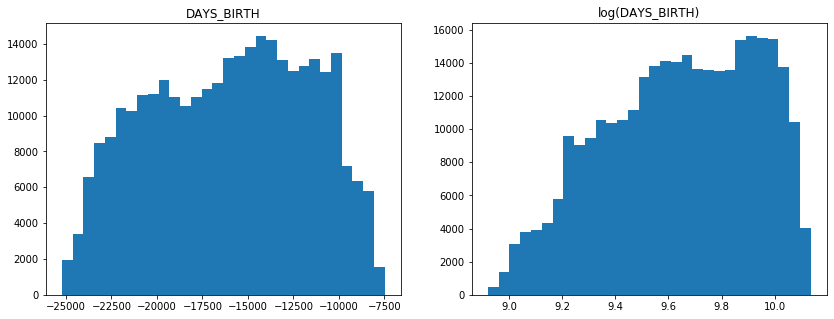

In [68]:
fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.hist(df.loc[df['TARGET'].isnull()==False,'DAYS_BIRTH'], bins=30)
plt.title('DAYS_BIRTH')

plt.subplot2grid((1,2),(0,1))
plt.hist(np.log(df.loc[df['TARGET'].isnull()==False,'DAYS_BIRTH']*(-1)), bins=30)
plt.title('log(DAYS_BIRTH)')

Text(0.5, 1.0, 'log(CREDIT_INCOME_PERCENT)')

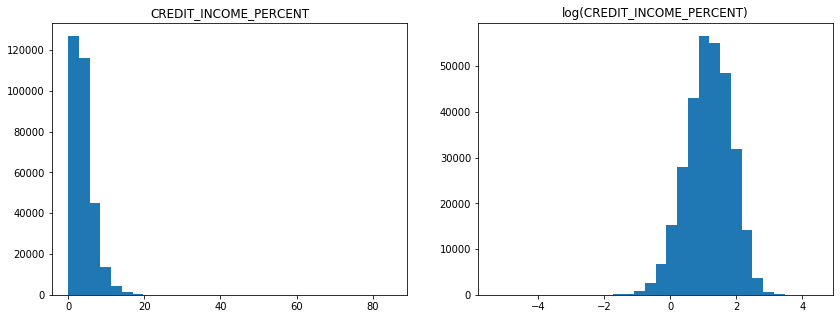

In [70]:
fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.hist(df.loc[df['TARGET'].isnull()==False,'CREDIT_INCOME_PERCENT'], bins=30)
plt.title('CREDIT_INCOME_PERCENT')

plt.subplot2grid((1,2),(0,1))
plt.hist(np.log(df.loc[df['TARGET'].isnull()==False,'CREDIT_INCOME_PERCENT']), bins=30)
plt.title('log(CREDIT_INCOME_PERCENT)')

Text(0.5, 1.0, 'log(ANNUITY_INCOME_PERCENT)')

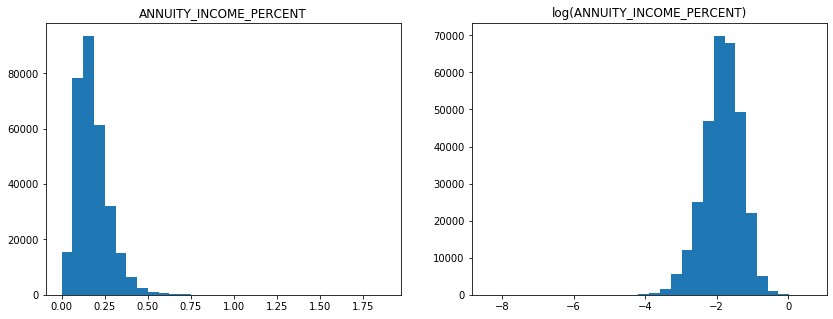

In [71]:
fig = plt.figure(figsize=(14,5))
plt.subplot2grid((1,2),(0,0))
plt.hist(df.loc[df['TARGET'].isnull()==False,'ANNUITY_INCOME_PERCENT'], bins=30)
plt.title('ANNUITY_INCOME_PERCENT')

plt.subplot2grid((1,2),(0,1))
plt.hist(np.log(df.loc[df['TARGET'].isnull()==False,'ANNUITY_INCOME_PERCENT']), bins=30)
plt.title('log(ANNUITY_INCOME_PERCENT)')

In [73]:
clustering_train = df.loc[df.TARGET.isnull()==False, ['DAYS_BIRTH', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT']].copy()
clustering_test = df.loc[df.TARGET.isnull()==True, ['DAYS_BIRTH', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT']].copy()

In [77]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(clustering_train)
clustering_train_scale = scale.transform(clustering_train)
clustering_test_scale = scale.transform(clustering_test)

Text(0.5, 1.0, 'Elbow Plot')

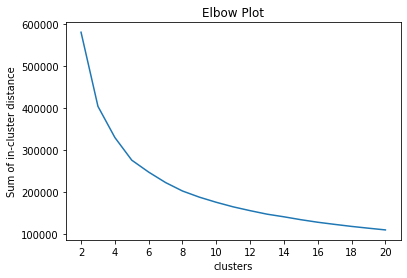

In [81]:
from sklearn.cluster import KMeans

clusters = np.arange(2, 21)
model = [KMeans(n, max_iter=1000, random_state=0).fit(clustering_train_scale) for n in clusters]

plt.plot(clusters, [m.inertia_ for m in model])
plt.xticks(range(2,22,2))
plt.xlabel('clusters')
plt.ylabel('Sum of in-cluster distance')
plt.title('Elbow Plot')

In [85]:
# 8 clusters
train_cluster = model[6].predict(clustering_train_scale)

In [87]:
test_cluster = model[6].predict(clustering_test_scale)

In [88]:
df.loc[df.TARGET.isnull()==False, 'CLUSTER'] = train_cluster
df.loc[df.TARGET.isnull()==True, 'CLUSTER'] = test_cluster

In [90]:
df.loc[df.TARGET.isnull()==False, 'CLUSTER'].value_counts()

6.0    56442
0.0    53549
4.0    50701
3.0    48448
1.0    45168
7.0    26726
5.0    19962
2.0     6515
Name: CLUSTER, dtype: int64

In [91]:
df.loc[df.TARGET.isnull()==True, 'CLUSTER'].value_counts()

6.0    10033
0.0     8869
4.0     8239
1.0     8162
3.0     7474
7.0     3294
5.0     2045
2.0      628
Name: CLUSTER, dtype: int64

In [92]:
for n in range(0,7):
    name = 'CLUSTER_'+str(n)
    df[name] = (df['CLUSTER']==n).astype('int')

In [93]:
df = df.drop(['CLUSTER'], axis=1)

## Save the cleaned dataset

In [95]:
df.dtypes.value_counts()

uint8      129
float64     74
int64       40
int32        7
dtype: int64

In [190]:
df.columns = df.columns.map(lambda x:x+'_APP')
df.rename(columns={'SK_ID_CURR_APP': 'SK_ID_CURR', 'TARGET_APP': 'TARGET'}, inplace=True)

In [192]:
df.to_csv('cleandata/application_clean.csv', index=False)

# 2. Bureau data preprocessing
Preprocess bureau.csv and bureau_balance.csv

## Basic exploration: outliers, missing value and categorical variable transformation

In [230]:
bureau = pd.read_csv('rawdata/bureau.csv')

In [231]:
bureau.dtypes.value_counts()

float64    8
int64      6
object     3
dtype: int64

In [232]:
np.sum(bureau.isnull(),axis=0)/bureau.shape[0]*100

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64

In [233]:
num_var = (bureau.dtypes == 'int64') | (bureau.dtypes == 'float64')
num_var_name = list(num_var[num_var==True].index)
num_var_name.remove('SK_ID_CURR')
num_var_name.remove('SK_ID_BUREAU')
len(num_var_name)

12

In [234]:
bureau[num_var_name].describe()
# no obvious outlier

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [235]:
str_var = bureau.dtypes == 'object'
str_var_name = list(str_var[str_var==True].index)
np.sum(bureau[str_var_name].isnull(),axis=0)

CREDIT_ACTIVE      0
CREDIT_CURRENCY    0
CREDIT_TYPE        0
dtype: int64

In [236]:
bureau = pd.get_dummies(bureau, columns=str_var_name)

In [237]:
bureaubalance = pd.read_csv('rawdata/bureau_balance.csv')

In [238]:
bureaubalance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [239]:
np.sum(bureaubalance.isnull(),axis=0)/bureaubalance.shape[0]

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [240]:
bureaubalance = pd.get_dummies(bureaubalance, columns=['STATUS'])

## Merge bureau and bureau_balance

In [241]:
list(bureaubalance.columns)

['SK_ID_BUREAU',
 'MONTHS_BALANCE',
 'STATUS_0',
 'STATUS_1',
 'STATUS_2',
 'STATUS_3',
 'STATUS_4',
 'STATUS_5',
 'STATUS_C',
 'STATUS_X']

In [243]:
# aggregate bureau_balance
bureaubalance_aggmethod={'MONTHS_BALANCE':['min', 'max', 'count', 'mean'],
                         'STATUS_0':['mean'],
                         'STATUS_1':['mean'],
                         'STATUS_2':['mean'],
                         'STATUS_3':['mean'],
                         'STATUS_4':['mean'],
                         'STATUS_5':['mean'],
                         'STATUS_C':['mean'],
                         'STATUS_X':['mean']}

In [244]:
bureaubalance_agg = bureaubalance.groupby('SK_ID_BUREAU').agg(bureaubalance_aggmethod)

In [245]:
bureaubalance_agg.head()

MONTHS_BALANCE                  STATUS_0 STATUS_1 STATUS_2  \
                        min max count  mean      mean     mean     mean   
SK_ID_BUREAU                                                              
5001709                 -96   0    97 -48.0  0.000000      0.0      0.0   
5001710                 -82   0    83 -41.0  0.060241      0.0      0.0   
5001711                  -3   0     4  -1.5  0.750000      0.0      0.0   
5001712                 -18   0    19  -9.0  0.526316      0.0      0.0   
5001713                 -21   0    22 -10.5  0.000000      0.0      0.0   

             STATUS_3 STATUS_4 STATUS_5  STATUS_C  STATUS_X  
                 mean     mean     mean      mean      mean  
SK_ID_BUREAU                                                 
5001709           0.0      0.0      0.0  0.886598  0.113402  
5001710           0.0      0.0      0.0  0.578313  0.361446  
5001711           0.0      0.0      0.0  0.000000  0.250000  
5001712           0.0      0.0      0.0  0.473684  0.000000  
5001713           0.0      0.0      0.0  0.000000  1.000000

In [246]:
bureaubalance_agg.columns = [n[0]+'_'+n[1].upper() for n in bureaubalance_agg.columns.tolist()]

In [247]:
bureaubalance_agg = bureaubalance_agg.reset_index()

In [248]:
# merge the two dataset
bureau_full=pd.merge(bureau, bureaubalance_agg, on='SK_ID_BUREAU', how='left')

## Cleaning and aggregating the merged bureau dataset

In [249]:
np.sum(bureau_full.isnull(),axis=0)/bureau_full.shape[0]

SK_ID_CURR                                                  0.000000
SK_ID_BUREAU                                                0.000000
DAYS_CREDIT                                                 0.000000
CREDIT_DAY_OVERDUE                                          0.000000
DAYS_CREDIT_ENDDATE                                         0.061496
DAYS_ENDDATE_FACT                                           0.369170
AMT_CREDIT_MAX_OVERDUE                                      0.655133
CNT_CREDIT_PROLONG                                          0.000000
AMT_CREDIT_SUM                                              0.000008
AMT_CREDIT_SUM_DEBT                                         0.150119
AMT_CREDIT_SUM_LIMIT                                        0.344774
AMT_CREDIT_SUM_OVERDUE                                      0.000000
DAYS_CREDIT_UPDATE                                          0.000000
AMT_ANNUITY                                                 0.714735
CREDIT_ACTIVE_Active              

In [250]:
bureau_full = bureau_full.drop(['SK_ID_BUREAU'], axis=1)

In [251]:
bureaufull_aggmethod_num = {'DAYS_CREDIT': ['min', 'max', 'mean'],
                            'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
                            'DAYS_CREDIT_UPDATE': ['min', 'max', 'mean'],
                            'CREDIT_DAY_OVERDUE': ['min', 'max', 'mean'],
                            'AMT_CREDIT_MAX_OVERDUE': ['min', 'max', 'mean'],
                            'AMT_CREDIT_SUM': ['min', 'max', 'mean','sum'],
                            'AMT_CREDIT_SUM_DEBT': ['min', 'max', 'mean','sum'],
                            'AMT_CREDIT_SUM_OVERDUE': ['min', 'max', 'mean','sum'],
                            'AMT_CREDIT_SUM_LIMIT': ['min', 'max', 'mean','sum'],
                            'AMT_ANNUITY': ['min', 'max', 'mean','sum'],
                            'CNT_CREDIT_PROLONG': ['min', 'max', 'mean'],
                            'MONTHS_BALANCE_MIN': ['min'],
                            'MONTHS_BALANCE_MAX': ['max'],
                            'MONTHS_BALANCE_COUNT': ['mean', 'sum'],
                            'MONTHS_BALANCE_MEAN': ['mean', 'sum']}

In [252]:
bureaufull_aggmethod_cat = {}
for col in list(bureau_full.columns):
    if col not in bureaufull_aggmethod_num.keys() and col != 'SK_ID_CURR' and col != 'DAYS_ENDDATE_FACT':
        bureaufull_aggmethod_cat[col] = ['mean']

In [253]:
bureau_agg = bureau_full.groupby('SK_ID_CURR').agg({**bureaufull_aggmethod_num, **bureaufull_aggmethod_cat})

In [254]:
bureau_agg.columns = [n[0].upper()+'_'+n[1].upper() for n in bureau_agg.columns.tolist()]
bureau_agg = bureau_agg.reset_index()

## Save the cleaned data set

In [255]:
bureau_agg.dtypes.value_counts()

float64    67
int64       9
dtype: int64

In [256]:
bureau_agg.columns = bureau_agg.columns.map(lambda x:x+'_BUREAU')
bureau_agg.rename(columns={'SK_ID_CURR_BUREAU': 'SK_ID_CURR'}, inplace=True)

In [257]:
bureau_agg.to_csv('cleandata/bureau_clean.csv', index=False)

# 3. Previous application data preprocessing
Preprocess previous_application.csv

In [258]:
prev_app = pd.read_csv('rawdata/previous_application.csv')
prev_app.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [259]:
num_var = (prev_app.dtypes == 'int64') | (prev_app.dtypes == 'float64')
num_var_name = list(num_var[num_var==True].index)
num_var_name.remove('SK_ID_CURR')
num_var_name.remove('SK_ID_PREV')

In [260]:
prev_app[num_var_name].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [261]:
# outlier:  365243
col_outlier = ['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
for n in col_outlier:
    prev_app[n].replace(365243, np.nan, inplace=True)

In [262]:
# percentage of missing values > 5%
np.sum(prev_app.isnull(),axis=0)/prev_app.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [263]:
# AMT_ACCEPT_RATE: credit get compared to the amount the client applied
prev_app['AMT_ACCEPT_RATE'] = prev_app['AMT_CREDIT']/prev_app['AMT_APPLICATION']

In [264]:
str_var = prev_app.dtypes == 'object'
str_var_name = list(str_var[str_var==True].index)
a = np.sum(prev_app[str_var_name].isnull(),axis=0)/prev_app.shape[0]*100
a[a>0]

NAME_TYPE_SUITE        49.119754
PRODUCT_COMBINATION     0.020716
dtype: float64

In [265]:
# mising value percentage below 5%, impute with mode
prev_app.loc[prev_app['PRODUCT_COMBINATION'].isnull()==True,'PRODUCT_COMBINATION']=prev_app['PRODUCT_COMBINATION'].value_counts().index[0]

In [266]:
# mising value percentage above 5%, new category: missing
prev_app.loc[prev_app['NAME_TYPE_SUITE'].isnull()==True,'NAME_TYPE_SUITE']='missing'

In [267]:
prev_app = pd.get_dummies(prev_app, columns=str_var_name)

## Aggregate the data set

In [272]:
col_num = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE',
           'HOUR_APPR_PROCESS_START','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED',
           'DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
           'DAYS_LAST_DUE','DAYS_TERMINATION','AMT_ACCEPT_RATE']

prevapp_aggmethod_num = {n:['min','max','mean'] for n in col_num}

In [275]:
prevapp_aggmethod_cat = {}

for n in list(prev_app.columns)[2:]:
    if n not in col_num:
        prevapp_aggmethod_cat[n]=['mean']

In [277]:
prevapp_agg = prev_app.groupby('SK_ID_CURR').agg({**prevapp_aggmethod_num, **prevapp_aggmethod_cat})

In [279]:
prevapp_agg.columns = [n[0].upper()+'_'+n[1].upper() for n in prevapp_agg.columns.tolist()]
prevapp_agg = prevapp_agg.reset_index()

In [283]:
# aggregate the approved cases

prev_1 = prev_app.loc[prev_app['NAME_CONTRACT_STATUS_Approved']==1,].copy()
approve_agg = prev_1.groupby('SK_ID_CURR').agg(prevapp_aggmethod_num)
approve_agg.columns = [n[0].upper()+'_'+n[1].upper()+'_APPROVED' for n in approve_agg.columns.tolist()]
approve_agg = approve_agg.reset_index()

In [285]:
# aggregate the rejected cases

prev_0 = prev_app.loc[prev_app['NAME_CONTRACT_STATUS_Refused']==0,].copy()
rej_agg = prev_0.groupby('SK_ID_CURR').agg(prevapp_aggmethod_num)
rej_agg.columns = [n[0].upper()+'_'+n[1].upper()+'_REJECT' for n in rej_agg.columns.tolist()]
rej_agg = rej_agg.reset_index()

In [287]:
prevapp_full=pd.merge(prevapp_agg, approve_agg, on='SK_ID_CURR', how='left')
prevapp_full=pd.merge(prevapp_full, rej_agg, on='SK_ID_CURR', how='left')

## Save the data

In [289]:
prevapp_full.dtypes.value_counts()

float64    302
int64        7
dtype: int64

In [290]:
prevapp_full.columns = prevapp_full.columns.map(lambda x:x+'_PREVAPP')
prevapp_full.rename(columns={'SK_ID_CURR_PREVAPP': 'SK_ID_CURR'}, inplace=True)

In [292]:
prevapp_full.to_csv('cleandata/previous_application_clean.csv', index=False)

# 4. Previous POS and cash loans data preprocessing
Preprocess POS_CASH_balance.csv

In [293]:
pos = pd.read_csv('rawdata/POS_CASH_balance.csv')

In [294]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [296]:
a = np.sum(pos.isnull(),axis=0)/pos.shape[0]*100
a[a>0]

CNT_INSTALMENT           0.260675
CNT_INSTALMENT_FUTURE    0.260835
dtype: float64

In [297]:
pos[['MONTHS_BALANCE','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE','NAME_CONTRACT_STATUS','SK_DPD','SK_DPD_DEF']].describe()
# no obvious outlier

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [303]:
pos.loc[pos['CNT_INSTALMENT'].isnull()==True,'CNT_INSTALMENT']=pos['CNT_INSTALMENT'].median()
pos.loc[pos['CNT_INSTALMENT_FUTURE'].isnull()==True,'CNT_INSTALMENT_FUTURE']=pos['CNT_INSTALMENT_FUTURE'].median()

In [305]:
pos = pd.get_dummies(pos,columns=['NAME_CONTRACT_STATUS'])

In [307]:
pos_aggmethod={'MONTHS_BALANCE':['min', 'max', 'count', 'mean'],
               'CNT_INSTALMENT':['min', 'max', 'mean'],
               'CNT_INSTALMENT_FUTURE':['min', 'max', 'mean'],
               'SK_DPD':['min', 'max', 'mean','sum'],
               'SK_DPD_DEF':['min', 'max', 'mean','sum'],
               'NAME_CONTRACT_STATUS_Active':['mean'],
               'NAME_CONTRACT_STATUS_Amortized debt':['mean'],
               'NAME_CONTRACT_STATUS_Approved':['mean'],
               'NAME_CONTRACT_STATUS_Canceled':['mean'],
               'NAME_CONTRACT_STATUS_Completed':['mean'],
               'NAME_CONTRACT_STATUS_Demand':['mean'],
               'NAME_CONTRACT_STATUS_Returned to the store':['mean'],
               'NAME_CONTRACT_STATUS_Signed':['mean'],
               'NAME_CONTRACT_STATUS_XNA':['mean']}

In [308]:
pos_agg = pos.groupby('SK_ID_CURR').agg(pos_aggmethod)
pos_agg.columns = [n[0].upper()+'_'+n[1].upper() for n in pos_agg.columns.tolist()]
pos_agg = pos_agg.reset_index()

In [310]:
pos_agg.dtypes.value_counts()

float64    18
int64      10
dtype: int64

In [311]:
pos_agg.columns = pos_agg.columns.map(lambda x:x+'_POS')
pos_agg.rename(columns={'SK_ID_CURR_POS': 'SK_ID_CURR'}, inplace=True)

In [313]:
pos_agg.to_csv('cleandata/pos_clean.csv',index=False)

# 5. Previous credit cards data preprocessing
Preprocess credit_card_balance.csv

In [315]:
creditcard = pd.read_csv('rawdata/credit_card_balance.csv')

In [317]:
creditcard.dtypes.value_counts()

float64    15
int64       7
object      1
dtype: int64

In [319]:
a = np.sum(creditcard.isnull(),axis=0)/creditcard.shape[0]*100
a[a>0]

AMT_DRAWINGS_ATM_CURRENT      19.524872
AMT_DRAWINGS_OTHER_CURRENT    19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
AMT_INST_MIN_REGULARITY        7.948208
AMT_PAYMENT_CURRENT           19.998063
CNT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
dtype: float64

In [322]:
num_var = (creditcard.dtypes == 'int64') | (creditcard.dtypes == 'float64')
num_var_name = list(num_var[num_var==True].index)
num_var_name.remove('SK_ID_CURR')
num_var_name.remove('SK_ID_PREV')

In [323]:
creditcard[num_var_name].describe()
# no obvious outlier

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [324]:
creditcard = pd.get_dummies(creditcard,columns=['NAME_CONTRACT_STATUS'])

In [326]:
credit_aggmethod={'MONTHS_BALANCE':['min', 'max', 'count', 'mean'],
                  'AMT_BALANCE':['min', 'max', 'mean'],
                  'AMT_CREDIT_LIMIT_ACTUAL':['min', 'max', 'mean'],
                  'AMT_DRAWINGS_ATM_CURRENT':['min', 'max', 'mean'],
                  'AMT_DRAWINGS_CURRENT':['min', 'max', 'mean'],
                  'AMT_DRAWINGS_OTHER_CURRENT':['min', 'max', 'mean'],
                  'AMT_DRAWINGS_POS_CURRENT':['min', 'max', 'mean'],
                  'AMT_INST_MIN_REGULARITY':['min', 'max', 'mean'],
                  'AMT_PAYMENT_CURRENT':['min', 'max', 'mean'],
                  'AMT_PAYMENT_TOTAL_CURRENT':['min', 'max', 'mean'],
                  'AMT_RECEIVABLE_PRINCIPAL':['min', 'max', 'mean'],
                  'AMT_RECIVABLE':['min', 'max', 'mean'],
                  'AMT_TOTAL_RECEIVABLE':['min', 'max', 'mean'],
                  'CNT_DRAWINGS_ATM_CURRENT':['min', 'max', 'mean'],
                  'CNT_DRAWINGS_CURRENT':['min', 'max', 'mean'],
                  'CNT_DRAWINGS_OTHER_CURRENT':['min', 'max', 'mean'],
                  'CNT_DRAWINGS_POS_CURRENT':['min', 'max', 'mean'],
                  'CNT_INSTALMENT_MATURE_CUM':['min', 'max', 'mean'],
                  'SK_DPD':['min', 'max', 'mean','sum'],
                  'SK_DPD_DEF':['min', 'max', 'mean','sum'],
                  'NAME_CONTRACT_STATUS_Active':['mean'],
                  'NAME_CONTRACT_STATUS_Approved':['mean'],
                  'NAME_CONTRACT_STATUS_Completed':['mean'],
                  'NAME_CONTRACT_STATUS_Demand':['mean'],
                  'NAME_CONTRACT_STATUS_Refused':['mean'],
                  'NAME_CONTRACT_STATUS_Sent proposal':['mean'],
                  'NAME_CONTRACT_STATUS_Signed':['mean']}

In [327]:
credit_agg = creditcard.groupby('SK_ID_CURR').agg(credit_aggmethod)
credit_agg.columns = [n[0].upper()+'_'+n[1].upper() for n in credit_agg.columns.tolist()]
credit_agg = credit_agg.reset_index()

In [329]:
credit_agg.dtypes.value_counts()

float64    57
int64      14
dtype: int64

In [330]:
credit_agg.columns = credit_agg.columns.map(lambda x:x+'_CREDITCARD')
credit_agg.rename(columns={'SK_ID_CURR_CREDITCARD': 'SK_ID_CURR'}, inplace=True)

In [332]:
credit_agg.to_csv('cleandata/credit_card_clean.csv',index=False)

# 6. Repayment history data preprocessing
Preprocess installments_payments.csv

In [333]:
repay = pd.read_csv('rawdata/installments_payments.csv')

In [335]:
repay.dtypes.value_counts()

float64    5
int64      3
dtype: int64

In [336]:
repay.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [337]:
col_name = ['NUM_INSTALMENT_VERSION','NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 
            'DAYS_ENTRY_PAYMENT','AMT_INSTALMENT', 'AMT_PAYMENT']

In [341]:
a=np.sum(repay.isnull(),axis=0)/repay.shape[0]*100
a[a>0]

DAYS_ENTRY_PAYMENT    0.021352
AMT_PAYMENT           0.021352
dtype: float64

In [340]:
repay[col_name].describe()

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [342]:
repay.loc[repay['DAYS_ENTRY_PAYMENT'].isnull()==True,'DAYS_ENTRY_PAYMENT']=repay['DAYS_ENTRY_PAYMENT'].median()
repay.loc[repay['AMT_PAYMENT'].isnull()==True,'AMT_PAYMENT']=repay['AMT_PAYMENT'].median()

In [348]:
# How many is repaid:
# PAYMENT_PERCENT
# PAYMENT_GAP
repay['PAYMENT_PERCENT'] = repay['AMT_PAYMENT'] / repay['AMT_INSTALMENT']
repay['PAYMENT_GAP'] = repay['AMT_INSTALMENT'] - repay['AMT_PAYMENT']

# Time point for repay: positive value-miss the due, negative-paid earlier
repay['PAYMENT_TIME'] = repay['DAYS_ENTRY_PAYMENT'] - repay['DAYS_INSTALMENT']

In [352]:
repay_aggmethod = {'DAYS_INSTALMENT':['min', 'max', 'mean'],
                   'DAYS_ENTRY_PAYMENT':['min', 'max', 'mean'],
                   'AMT_INSTALMENT':['min', 'max', 'mean', 'sum'],
                   'AMT_PAYMENT':['min', 'max', 'mean','sum'],
                   'PAYMENT_PERCENT':['min', 'max', 'mean'],
                   'PAYMENT_GAP':['min', 'max', 'mean','sum'],
                   'PAYMENT_TIME':['min', 'max', 'mean','sum']}

In [353]:
repay_agg = repay.groupby('SK_ID_CURR').agg(repay_aggmethod)
repay_agg.columns = [n[0].upper()+'_'+n[1].upper() for n in repay_agg.columns.tolist()]
repay_agg = repay_agg.reset_index()

In [356]:
repay_agg.dtypes.value_counts()

float64    25
int64       1
dtype: int64

In [357]:
repay_agg.columns = repay_agg.columns.map(lambda x:x+'_REPAY')
repay_agg.rename(columns={'SK_ID_CURR_REPAY': 'SK_ID_CURR'}, inplace=True)

In [360]:
repay_agg.to_csv('cleandata/installments_payments_clean.csv',index=False)

# 7. Merge all the data sets

In [361]:
whole=pd.merge(df, bureau_agg, on='SK_ID_CURR', how='left')
whole=pd.merge(whole, prevapp_full, on='SK_ID_CURR', how='left')
whole=pd.merge(whole, pos_agg, on='SK_ID_CURR', how='left')
whole=pd.merge(whole, credit_agg, on='SK_ID_CURR', how='left')
whole=pd.merge(whole, repay_agg, on='SK_ID_CURR', how='left')

In [362]:
whole.shape

(356255, 755)

In [363]:
whole.head()

,index_APP,SK_ID_CURR,TARGET,CNT_CHILDREN_APP,AMT_INCOME_TOTAL_APP,AMT_CREDIT_APP,AMT_ANNUITY_APP,AMT_GOODS_PRICE_APP,REGION_POPULATION_RELATIVE_APP,DAYS_BIRTH_APP,...,PAYMENT_PERCENT_MAX_REPAY,PAYMENT_PERCENT_MEAN_REPAY,PAYMENT_GAP_MIN_REPAY,PAYMENT_GAP_MAX_REPAY,PAYMENT_GAP_MEAN_REPAY,PAYMENT_GAP_SUM_REPAY,PAYMENT_TIME_MIN_REPAY,PAYMENT_TIME_MAX_REPAY,PAYMENT_TIME_MEAN_REPAY,PAYMENT_TIME_SUM_REPAY
0,0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,...,1.0,1.000000,0.0,0.000,0.000000,0.000,-31.0,-12.0,-20.421053,-388.0
1,1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,...,1.0,1.000000,0.0,0.000,0.000000,0.000,-14.0,-1.0,-7.160000,-179.0
2,2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,...,1.0,1.000000,0.0,0.000,0.000000,0.000,-11.0,-3.0,-7.666667,-23.0
3,3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,...,1.0,1.000000,0.0,0.000,0.000000,0.000,-77.0,-1.0,-19.375000,-310.0
4,4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,...,1.0,0.954545,0.0,22655.655,452.384318,29857.365,-31.0,12.0,-3.636364,-240.0


In [364]:
whole = whole.drop('index_APP', axis=1)

In [368]:
whole.loc[whole.TARGET.isnull()==False,].to_csv('cleandata/train.csv',index=False)

In [371]:
whole.loc[whole.TARGET.isnull()==True,].to_csv('cleandata/kaggle_test.csv',index=False)